In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0, 0.5, 'Y dataset')

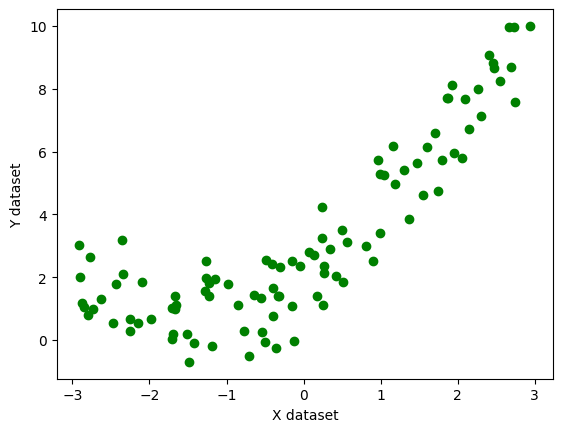

In [24]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree = 2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred = reg.predict(x_test_poly)

In [33]:
from sklearn.metrics import r2_score

In [34]:
score=r2_score(y_test,y_pred)
print(score)

0.8987033021994207


In [35]:
print(reg.coef_)

[[0.         1.42669715 0.47538554]]


In [36]:
print(reg.intercept_)

[1.9471019]


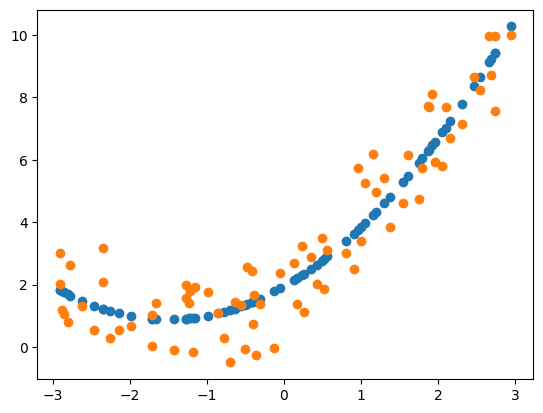

In [37]:
plt.scatter(x_train, reg.predict(x_train_poly))
plt.scatter(x_train, y_train)

In [38]:
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(x_train_poly, y_train)
y_pred = reg.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8987033021994207


In [ ]:
## Prediction new Dataset
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)

In [40]:
y_new = reg.predict(x_new_poly)

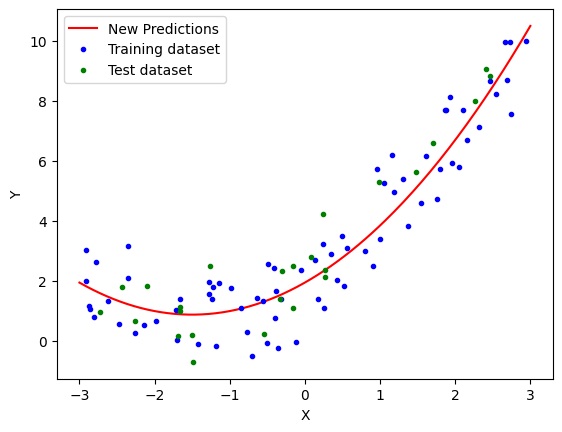

In [42]:
plt.plot(x_new, y_new, "r-", label = "New Predictions")
plt.plot(x_train, y_train, "b.", label = "Training dataset")
plt.plot(x_test, y_test, "g.", label = "Test dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [43]:
# PIPELINE

In [45]:
from sklearn.pipeline import Pipeline

In [56]:
def poly_reg(degree):
    x_new = np.linspace(-3,3, 200).reshape(200,1)
    
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()

    poly_reg = Pipeline([('poly_features', poly_features), ('lin_reg', lin_reg)])

    poly_reg.fit(x_train, y_train)
    y_pred = poly_reg.predict(x_new)

    plt.plot(x_new, y_new, "r-", label = "Degree" + str(degree))
    plt.plot(x_train, y_train, "b.")
    plt.plot(x_test, y_test, "g.")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

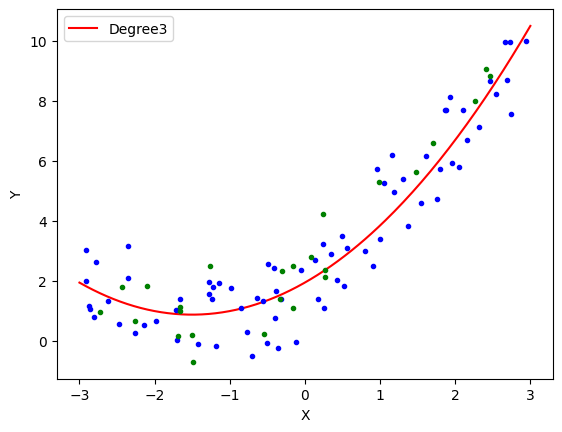

In [57]:
poly_reg(3)

In [59]:
def compare_poly_degrees(degree_list, x_train, y_train, x_test, y_test):
    results = []

    for degree in degree_list:
        pipeline = Pipeline([
            ('poly_features', PolynomialFeatures(degree=degree)),
            ('lin_reg', LinearRegression())
        ])

        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)

        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        p = pipeline.named_steps['poly_features'].fit_transform(x_test).shape[1] - 1
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        results.append((degree, r2, adj_r2))

    return results


In [60]:
degrees = [1, 2, 3, 4, 5]
metrics = compare_poly_degrees(degrees, x_train, y_train, x_test, y_test)

for deg, r2, adj_r2 in metrics:
    print(f"Degree: {deg} | R²: {r2:.4f} | Adjusted R²: {adj_r2:.4f}")


Degree: 1 | R²: 0.7576 | Adjusted R²: 0.7471
Degree: 2 | R²: 0.8987 | Adjusted R²: 0.8895
Degree: 3 | R²: 0.9026 | Adjusted R²: 0.8887
Degree: 4 | R²: 0.9006 | Adjusted R²: 0.8808
Degree: 5 | R²: 0.9006 | Adjusted R²: 0.8745


In [62]:
# Find the degree with the highest Adjusted R²
best = max(metrics, key=lambda x: x[2])  # x[2] is adj_r2

best_deg, best_r2, best_adj_r2 = best

print("\nBest Degree Based on Adjusted R²:")
print(f"Degree: {best_deg} | R²: {best_r2:.4f} | Adjusted R²: {best_adj_r2:.4f}")



Best Degree Based on Adjusted R²:
Degree: 2 | R²: 0.8987 | Adjusted R²: 0.8895


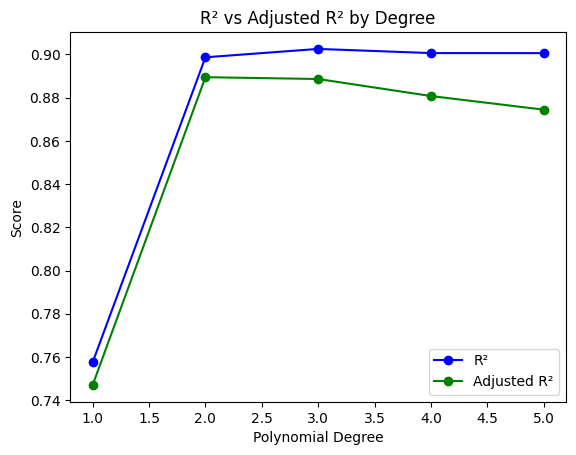

In [63]:
import matplotlib.pyplot as plt

degrees = [d for d, _, _ in metrics]
r2s = [r for _, r, _ in metrics]
adj_r2s = [a for _, _, a in metrics]

plt.plot(degrees, r2s, 'bo-', label='R²')
plt.plot(degrees, adj_r2s, 'go-', label='Adjusted R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('R² vs Adjusted R² by Degree')
plt.legend()
plt.show()


In [ ]:
# END